# **An investigation of thermal resources in the Sabine Uplift region of Northwest Louisiana and East Texas to inform the feasibility of grid-scale geothermal energy**

##By Zach Hom and Jaimie Morris

*GitHub IO Link:* https://jaimiem17.github.io/

###**Collaboration Plan**
We set up our shared Colab Notebook and our shared GitHub repository that we have been pushing and pulling to in order to collaborate on the code. We have been discussing the project multiple times a week over the phone with an in-person meet up time once a week since before break (about 4 times) to walk through our code and future plans.

###**Project Plan & Description**
We want to identify well locations that can reasonably support grid-scale geothermal energy generation. To accomplish this, we want to use thermal well data and gravity data to identify exploitable shallow wells with high subsurface temperatures. High subsurface temperatures suggest abundant thermal resources. Gravity data can also inform subsurface formations that can help to identify thermal resources. Regions with high density and compaction are common harborers of geothermal resources; therefore, these areas are of great interest to our research topic. We acquired data for abandoned wells across the US from the SMU Geothermal Lab, which we will constrain to our areas of interest (TX and LA). We have also obtained Texas gravity data from USGS which we can use to identify and plot high gravity areas. Data is available for Louisiana as well, but it is included in another dataset along with Arkansas. We must filter for Louisiana observations and merge the dataset with the Texas dataset. All three of these datasets will help us to predict the location of thermal resources as well as the most feasible abandoned well locations for grid-scale geothermal development.


##**Getting Started**
In order to conduct the analysis, let's first set up an environment connected to the GitHub repository for easy CI/CD as well as useful data manipulation Python packages.

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

%cd /content
!git config --global user.name "zxhom26"
!git config --global user.email "zxhom26@gmail.com"

if not os.path.exists('/content/Geothermal'):
  !git clone https://github.com/zxhom26/Geothermal.git

%cd /content/Geothermal

/content
/content/Geothermal


In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Let's make sure we're in the correct "colab" branch of our repository.

In [70]:
!git fetch origin # fetch changes from the remote repository
!git branch -r # lists all remote branches
!git branch # check what our current branch is
!git switch colab # switch to our desired branch: colab

  origin/HEAD -> origin/main
  origin/colab
  origin/main
* colab
  main
Already on 'colab'
Your branch is up to date with 'origin/colab'.


**Here** We wrote a push_repo function to reduce git command redundancy for pushes to the remote repository.

In [71]:
'''
push_repo function automates git commands to push changes to remote repository
@param message is a string to describe action to be pushed
'''
def push_repo(message):
  if message is None:
    print("please add a message")
    return 1
  # Check status before commit
  !git status
  # Stage changes
  !git add .
  # Commit changes
  !git commit -m f"{message}"
  # Push changes
  push_result = !git push origin colab  # or 'master', depending on your default branch
  print(push_result)  # Print the output of the push to check for errors
  # Check status again after commit
  !git status
  return 0

'''
path_exists function checks if the file has already been created and stored
in the remote repository; if not, then it pushes the file to remote
@param path is a string path name, message is passed to push_repo for commits
'''
def path_exists(path, message):
  if not os.path.exists(f"{path}"):
    if push_repo(f"{message}") == 0:
      print("Push success.")
      return
    else:
      print("Push fail.")
      return
  else:
    print("File already exists.")
    return

##**Thermal Data Analysis**
Now that our environment is set up, let's import some thermal data! We acquired this data from Dr. Richards at the SMU Geothermal Laboratory who collected data from wells across the US. This data includes information about bottom-hole temperature, heat flow, thermal conductivity, and thermal gradients. Let's load in the data and store it in the remote repository.

In [72]:
# Clean the data by changing encoding type by reading, replacing NaN values, and writing to new cleaned file
if not os.path.exists("/content/Geothermal/cleaned_SMU_BHT.csv"):
  with open("SMU_BHT(SMU-BHT 6-11-2020).csv", "r", encoding="ascii", errors="replace") as f:
      content = f.read()
  with open("cleaned_SMU_BHT.csv", "w", encoding="utf-8") as f:
      f.write(content)

  # Read in the csv file and store the clean data to a Pandas Dataframe
  BHT = pd.read_csv("cleaned_SMU_BHT.csv", encoding="utf-8")

  # Push the clean, raw data to the GitHub repository
  BHT.to_csv("/content/Geothermal/cleaned_SMU_BHT.csv", index=False, encoding="utf-8")
  push_repo("cleaning raw data")

We are focused specifically on the Sabine Uplift region. Let's filter the national data to our desired locations (TX and LA). Additionally, let's store data from attributes concerning heat, geology, and geographic location.

In [73]:
BHT = pd.read_csv("cleaned_SMU_BHT.csv", encoding="utf-8")

# Filter for only TX and LA well data
BHT_TXLA = BHT[BHT['surface_interval_id'].str.contains("TX|LA", na=False, regex=True)]

# Store attributes we want
BHT_Data = BHT_TXLA.loc[:, [
  "database",
  "api",
  "longitude",
  "latitude",
  "surface_interval_id",
  "depth",
  "uncor_bht",
  "harrison_correction",
  "bhtcorrected_temp",
  "surface_temp",
  "harrison_gradient",
  "reference_data_set",
  "state",
  "k_source",
  "k_section",
  "resistance",
  "k",
  "q_calculated",
  "basement_depth",
  "correction",
  "well_ave_hf",
  "file_number",
  "operation_name",
  "drilling_start",
  "drilling_complete",
  "state_plane_meter_x_coordinate",
  "state_plane_meter_y_coordinate",
  "company_name",
  "well_type",
  "well_status",
  "field_name",
  "formation",
  "elevation_measured",
  "elevation_m",
  "county_name",
  "surface_id",
  "bottom_id",
  ]]

BHT_Data['depth (km)'] = BHT_Data['depth'] / 1000

# Push the focused dataset to the repository
if not os.path.exists("/content/Geothermal/BHT_Data.csv"):
  BHT_Data.to_csv("/content/Geothermal/BHT_Data.csv", index=False, encoding="utf-8")
  push_repo("filtering for our desired states and attributes")


<ipython-input-73-3a33c6e78938>:1: DtypeWarning: Columns (1,15,24,25,26,27,31,32,33,34,35,36,42,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  BHT = pd.read_csv("cleaned_SMU_BHT.csv", encoding="utf-8")


You may notice that the dataset includes multiple variables that reference bottom hole temperature (BHT). This is because BHTs can be influenced by many physical factors. To create wells, contractors use high powered drills to penetrate the surface. These drills use an extreme amount of force to break through solid rock. Inevitably, this results in a buildup of friction that heats the borehole during the drilling process. Corrections must be made for this rightward bias in order to obtain an accurate BHT reading. Following this logic, we will only reference corrected BHT values in our analysis.

### Visualizing Thermal Data
Now that our data is cleaned and filtered appropriately, let's make some plots to help us visualize the thermal data. We can see below that the BHT data is bimdoal with most wells sitting at temperatures around 60°C or 130°C.

<Axes: xlabel='Corrected Bottom Hole Temperature (°C)', ylabel='Frequency'>

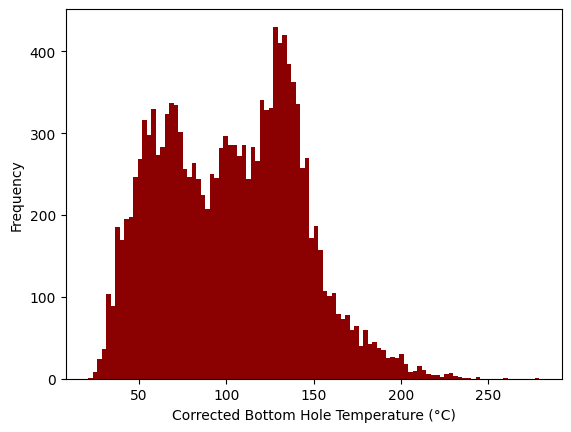

In [74]:
BHT_Data["bhtcorrected_temp"].plot.hist(xlabel="Corrected Bottom Hole Temperature (°C)", ylabel="Frequency", color="darkred", bins=100)


### What Makes a Good Well?
In order for a thermal resource to be considered for grid scale production, it must be within a reasonable exploitation range for both temperature (>120°C) and depth (~<4 km) in order to be profitable. Let's filter the observations for the desired criteria now. As we can see, there are many well sites that are both shallow and hot within exploitation range. The most desirable sites are shallow wells with high BHTs.



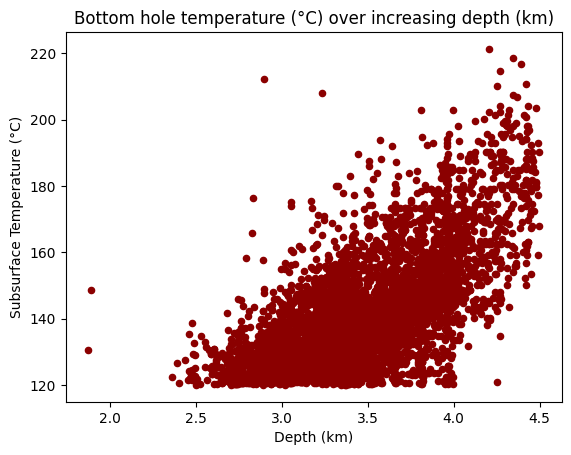

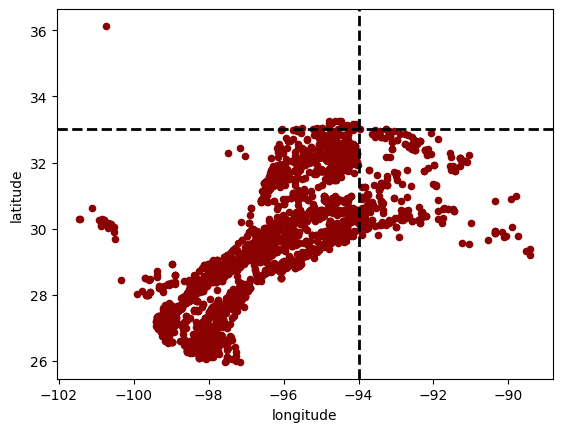

In [75]:
Hot_BHT = BHT_Data[BHT_Data["bhtcorrected_temp"] > 120]
Hot_Shallow_BHT = Hot_BHT[Hot_BHT["depth (km)"] <= 4.5]

# Temp vs Depth
Hot_Shallow_BHT.plot.scatter(xlabel="Depth (km)", ylabel="Subsurface Temperature (°C)", x="depth (km)", y="bhtcorrected_temp", color="darkred")
plt.title("Bottom hole temperature (°C) over increasing depth (km)")

# Geospatial
Hot_Shallow_BHT.plot.scatter(x="longitude", y="latitude", color="darkred")
plt.axvline(x=-94, color='black', linestyle='--', linewidth=2, label='State-lines boundary TX|LA')
plt.axhline(y=33, color='black', linestyle='--', linewidth=2, label='State-lines boundary TX|LA')

#Hot_BHT.plot.scatter(xlabel="Thermal Conductivity", ylabel="Heat Flow", x="k", y="q_calculated", color="darkred")

## Interesting Stats!

Text(0.5, 1.0, 'Bottom hole temperature (°C) over increasing depth (km)')

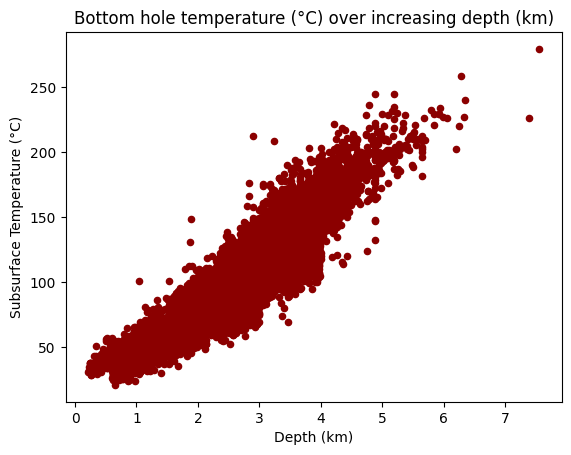

In [76]:
BHT_Data.plot.scatter(xlabel="Depth (km)", ylabel="Subsurface Temperature (°C)", x="depth (km)", y="bhtcorrected_temp", color="darkred")
plt.title("Bottom hole temperature (°C) over increasing depth (km)")

There seems to be a mildly strong, positive correlation between depth and bottom hole temperature of 0.93. This suggests that increasing depth may be related to increasing subsurface temperatures.

In [77]:
BHT_Data["depth (km)"].corr(BHT_Data["bhtcorrected_temp"])

0.9314111931388095

The most frequent BHT across the sampled Texas and Louisiana wells is 143°C with 45 wells sharing the same BHT.

In [78]:
print(BHT_Data["bhtcorrected_temp"].value_counts().max())
BHT_Data["bhtcorrected_temp"].value_counts().idxmax()

45


143.0

The average depth for wells with the most frequent BHT of 143°C is 3.58 km.

In [79]:
BHT_Data[BHT_Data["bhtcorrected_temp"] == 143]["depth (km)"].mean()

3.583053333333333

### Geological Considerations **WORK IN PROGRESS**
Though it may seem like we've identified desirable locations for geothermal development, there are many more factors that we must take into consideration. Geological formations very by site. Salt domes and diapirs are characteristic of the Gulf Coast due to periodic opening and closing of the region over geologic time. As the Mississipi and other sediment sources fed the gulf, these salt layer were buried; however, salt is less dense than rock and sediment causing it to migrate vertically to create salt diapirs that stretch like fingers out of the subsurface. Salt is also more thermally conductive than rock (???). Thus, diapirs allow for the efficient transfer of heat across the vertical gradient, making regions with diapirs warmer than those without.

Now lets filter our data to visualize areas with high thermal conductivity that suggests the presence of salt diapirs.

,count
state,
TX,2911
LA,72


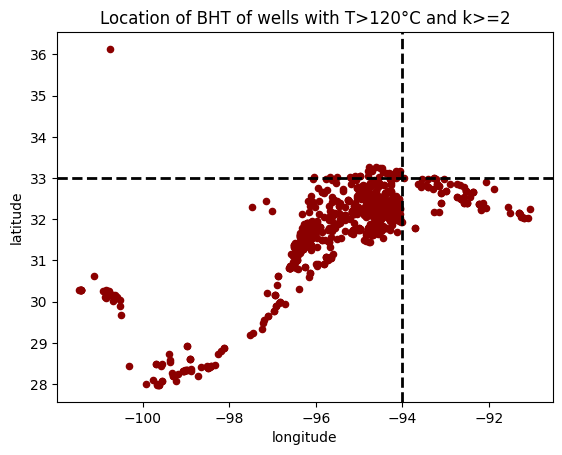

In [80]:
Salty_Data = Hot_BHT[Hot_BHT["k"] >= 2] # FOR SALT DOME CONSIDERATIONS

Salty_Data.plot.scatter(title="Location of BHT of wells with T>120°C and k>=2",x="longitude", y="latitude", color="darkred")
plt.axvline(x=-94, color='black', linestyle='--', linewidth=2, label='State-lines boundary TX|LA')
plt.axhline(y=33, color='black', linestyle='--', linewidth=2, label='State-lines boundary TX|LA')

Salty_Data[["state"]].value_counts()

In [81]:

Hot_BHT.groupby(["state", "county_name"])["bhtcorrected_temp"].mean().unstack()

Hot_BHT[Hot_BHT["state"] == "LA"]["bhtcorrected_temp"]

,bhtcorrected_temp
6511,120.8
6544,136.8
6545,129.1
6554,120.2
6574,124.9
...,...
7838,158.9
7843,125.8
7864,120.7
7871,124.7


##**Gravity Data Analysis**
#### Data Processing
Gravity data measures local gravity anomalies due to differences in rock density in the subsurface. We can use this data to infer rock composition and geological structures like the Sabine Uplift. For our purposes we can identify high gravity regions that are indicative of geothermal resources. We have imported public gravity data from [USGS](https://pubs.usgs.gov/ds/2006/232/data/) below for the Texas, Arkansas, and Louisiana region. Let's start processing the data to make it more useful for our analysis!



In [82]:
!tail "/content/Geothermal/texas_gravity_stations.txt"

1501103   -100.8910     36.5000    905.2    9799564.80   0.01   0.07  -17.34  -119.59 
7461 43   -100.8000     36.5000    895.2    9799567.70   0.00   0.07  -17.53  -118.65 
7461 43   -100.7500     36.5000    889.1    9799568.79   0.00   0.07  -18.32  -118.76 
7461 43   -100.7000     36.5000    883.9    9799569.40   0.00   0.08  -19.31  -119.15 
1501103   -100.6748     36.5000    881.4    9799569.60   0.00   0.08  -19.88  -119.44 
7461 43   -100.6450     36.5000    876.0    9799571.20   0.00   0.08  -19.95  -118.90 
1501103   -100.6387     36.5000    874.9    9799571.30   0.00   0.08  -20.19  -119.02 
1501103   -100.6207     36.5000    872.5    9799571.70   0.00   0.08  -20.53  -119.09 
1501103   -100.6032     36.5000    868.1    9799572.60   0.00   0.08  -20.99  -119.05 
7461 43   -100.5883     36.5000    865.0    9799574.10   0.00   0.08  -20.44  -118.15 


The data above is formatted so that station ID is in the first column; however, we see that come station IDs contain spaces. This makes it difficult for Pandas to interpret the station IDs as one column like we would expect. We can modify the raw text file using the Bash command *`awk`*. Since we're operating on a macroscopic scale of the East Texas/Northwestern Louisiana region, geographic location of observations like latitude and longitude are more useful than station IDs. Therefore, we can use *`awk`* to remove the column by specifying a subset of each line starting after the station ID. This method avoids issues involving space delimiters.

In [83]:
!awk '{printf "%s\n",substr($0,11);}' "/content/Geothermal/texas_gravity_stations.txt" > filter_column.txt
!head filter_column.txt

 -97.5000     25.9017     11.4    9799024.10   0.01  -0.02    9.75     8.45 
 -97.5183     25.9283     12.6    9799023.90   0.01  -0.01    8.03     6.60 
 -97.4583     25.9417      6.4    9799034.60   0.00  -0.02   15.87    15.12 
 -97.5700     25.9717     12.5    9799022.50   0.00  -0.02    3.52     2.08 
 -97.4433     25.9750      7.6    9799039.50   0.00  -0.02   18.77    17.89 
 -97.1833     25.9883      1.5    9799062.60   0.00  -0.01   39.04    38.86 
 -97.5300     25.9950      8.1    9799030.10   0.00  -0.02    8.10     7.16 
 -97.4233     25.9950     12.1    9799042.00   0.02  -0.01   21.24    19.88 
 -97.5583     26.0500     10.3    9799031.30   0.00  -0.02    6.07     4.88 
 -97.3967     26.0550      2.4    9799051.71   0.00  -0.02   23.68    23.39 


Now that we've cleaned the data, let's load it into a Pandas *`Dataframe`* so we manipulate it using Python packages.

In [84]:
variables = ["Longitude",
             "Latitude",
             "Station_elevation_m",
             "Observed_gravity_mGals",
             "Inner_terrain_correction_mGals",
             "Outer_terrain_correction_mGals",
             "Free_air_gravity_anomaly_mGals",
             "Bouguer_gravity_anomaly_mGals"]

raw_texas_grav = pd.read_csv("filter_column.txt",
                             header=None, sep="\s+",
                             names=variables)
raw_texas_grav.head()

,Longitude,Latitude,Station_elevation_m,Observed_gravity_mGals,Inner_terrain_correction_mGals,Outer_terrain_correction_mGals,Free_air_gravity_anomaly_mGals,Bouguer_gravity_anomaly_mGals
0,-97.5000,25.9017,11.4,9799024.1,0.01,-0.02,9.75,8.45
1,-97.5183,25.9283,12.6,9799023.9,0.01,-0.01,8.03,6.60
2,-97.4583,25.9417,6.4,9799034.6,0.00,-0.02,15.87,15.12
3,-97.5700,25.9717,12.5,9799022.5,0.00,-0.02,3.52,2.08
4,-97.4433,25.9750,7.6,9799039.5,0.00,-0.02,18.77,17.89


### Interesting Statistics

Longitude                         0.134056
Latitude                          0.134056
Station_elevation_m               0.134056
Observed_gravity_mGals            0.134056
Inner_terrain_correction_mGals    0.134056
Outer_terrain_correction_mGals    0.134056
Free_air_gravity_anomaly_mGals    0.134056
Bouguer_gravity_anomaly_mGals     0.134056
Grav Anomaly [m/s^2]              0.134056
dtype: float64


Text(0.5, 1.0, 'Locations of Positive Gravity Anomalies in Texas')

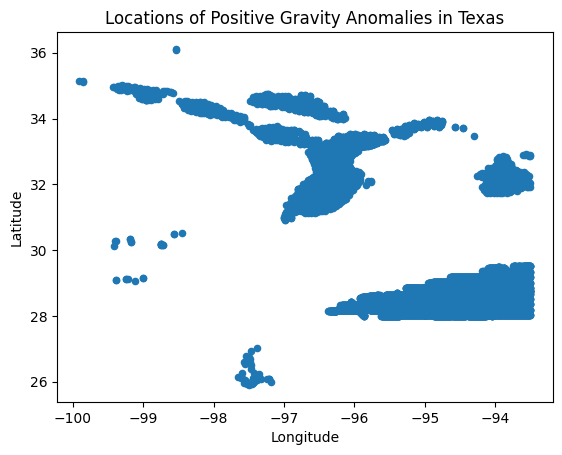

In [85]:
raw_texas_grav["Grav Anomaly [m/s^2]"] = raw_texas_grav["Bouguer_gravity_anomaly_mGals"] / 10e5
print(raw_texas_grav[raw_texas_grav["Grav Anomaly [m/s^2]"] > 0].count() / raw_texas_grav.count())
# Only 13% of observations have a positive gravity anomaly

raw_texas_grav[raw_texas_grav["Grav Anomaly [m/s^2]"] > 0].plot.scatter(x="Longitude", y="Latitude")
plt.title("Locations of Positive Gravity Anomalies in Texas")

There is a strong, negative correlation between bouguer gravity anomaly and station elevation of -0.93.

In [86]:
raw_texas_grav["Station_elevation_m"].corr(raw_texas_grav["Bouguer_gravity_anomaly_mGals"])

-0.9323728145942691

ff

In [87]:
raw_texas_grav["Station_elevation_m"].corr(raw_texas_grav["Observed_gravity_mGals"])

-0.516657269284242

#### Visualizing Gravity Data
Now let's visualize the observations using a scatterplot. We can clearly see the outline of the US-Mexico border. Notice the few observations that lie outside the Texas region. The authors of this dataset used them for additional controls.

<Axes: xlabel='Longitude', ylabel='Latitude'>

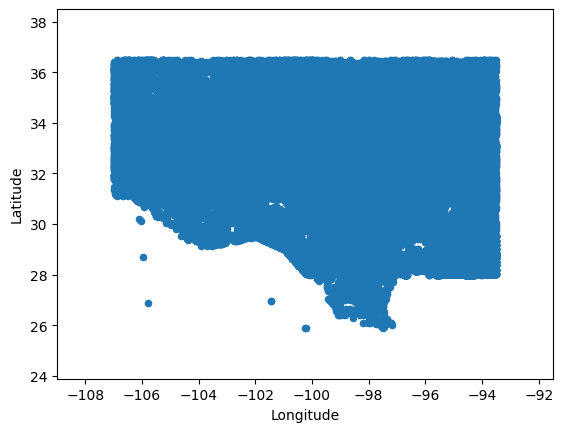

In [88]:
raw_texas_grav.plot.scatter(x="Longitude", y="Latitude", xlim=[raw_texas_grav["Longitude"].min()-2,raw_texas_grav["Longitude"].max()+2], ylim=[raw_texas_grav["Latitude"].min()-2, raw_texas_grav["Latitude"].max()+2])

Now let's filter our data to show only high gravity regions (top 75% of observations). The region of high gravity is highly concentrated to East Texas. We expect this because it is the location of the Sabine Uplift which contains highly dense and compacted rock formations that contribute to a high gravity anomoly.

<Axes: xlabel='Longitude', ylabel='Latitude'>

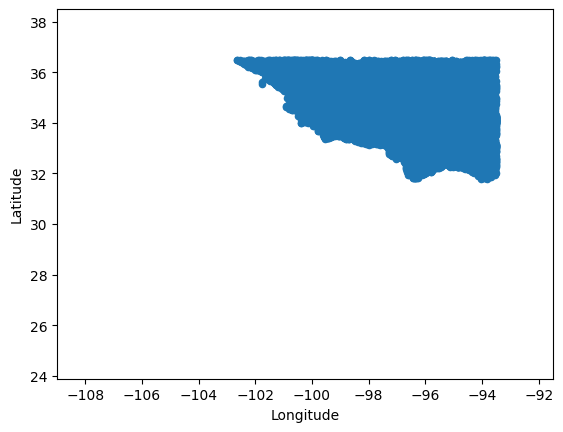

In [89]:
high_grav_points = raw_texas_grav[raw_texas_grav["Observed_gravity_mGals"] > raw_texas_grav["Observed_gravity_mGals"].quantile(0.75)]
high_grav_points.plot.scatter(x="Longitude", y="Latitude", xlim=[raw_texas_grav["Longitude"].min()-2,raw_texas_grav["Longitude"].max()+2], ylim=[raw_texas_grav["Latitude"].min()-2, raw_texas_grav["Latitude"].max()+2])

In [90]:
!jupyter nbconvert "/content/drive/MyDrive/Colab Notebooks/Hom-Morris_Geothermal.ipynb" --to html

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Hom-Morris_Geothermal.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 8 image(s).
[NbConvertApp] Writing 661893 bytes to /content/drive/MyDrive/Colab Notebooks/Hom-Morris_Geothermal.html
